Upload and load the data

In [1]:
import pandas as pd

# Upload from local (Colab)
from google.colab import files
uploaded = files.upload()

# Load the two CSVs
ndwi_df = pd.read_csv("Monthly_NDWI_Landsat_Export.csv")
climate_df = pd.read_csv("Monthly_Rainfall_Temp_Export.csv")

# Convert both 'Date' columns to standard format
ndwi_df['Date'] = pd.to_datetime(ndwi_df['Date']).dt.to_period('M').dt.to_timestamp()
climate_df['Date'] = pd.to_datetime(climate_df['Date']).dt.to_period('M').dt.to_timestamp()

# Merge
merged_df = pd.merge(ndwi_df[['Date', 'NDWI']],
                     climate_df[['Date', 'Rainfall_mm', 'Tmax_C', 'Tmin_C']],
                     on='Date', how='inner')

# Drop any rows with missing values
merged_df.dropna(inplace=True)

# Check result
merged_df.head()


Saving Monthly_NDWI_Landsat_Export.csv to Monthly_NDWI_Landsat_Export.csv
Saving Monthly_Rainfall_Temp_Export.csv to Monthly_Rainfall_Temp_Export.csv


,Date,NDWI,Rainfall_mm,Tmax_C,Tmin_C
0,2010-01-01,-0.163519,11.074676,23.881618,8.463699
1,2010-02-01,-0.144679,19.892497,28.894566,13.180347
2,2010-04-01,-0.149000,19.427880,39.462312,23.627746
3,2010-05-01,-0.110146,50.153191,38.088555,24.969364
4,2010-06-01,-0.168280,131.872696,34.349364,24.527746


Data Visualisation:NDWI, Rainfall, Temperature Over Time

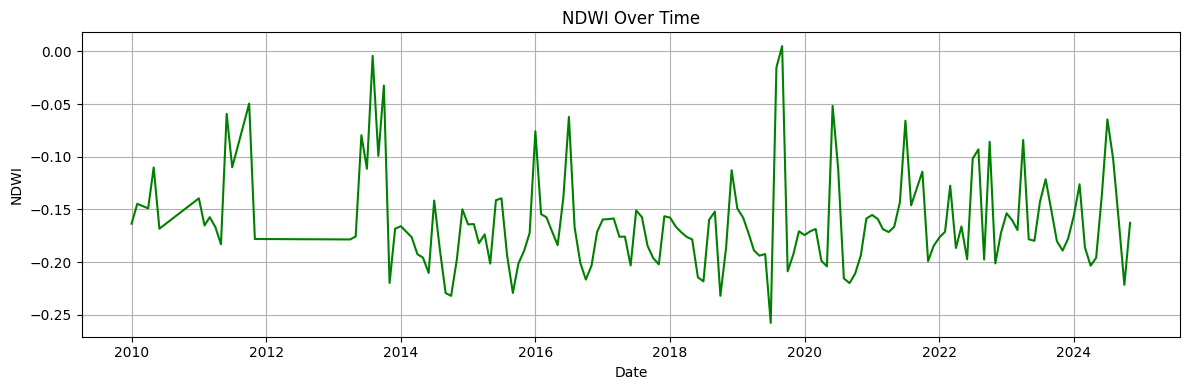

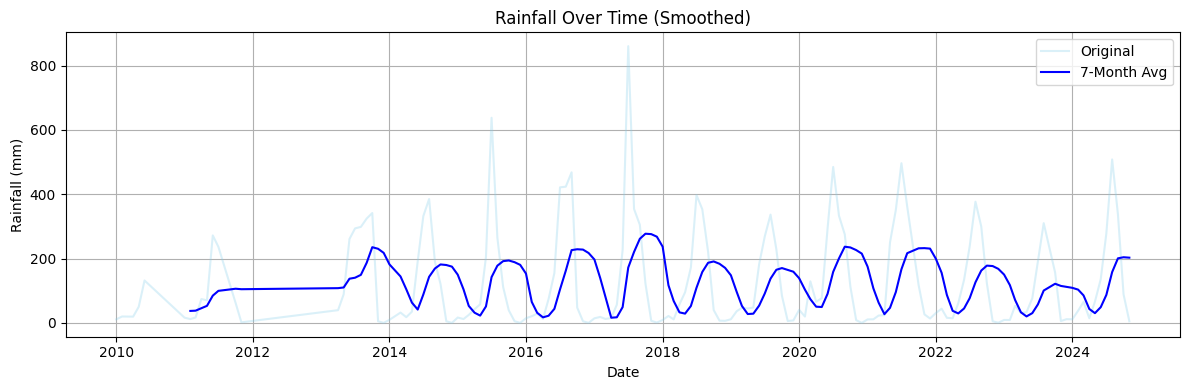

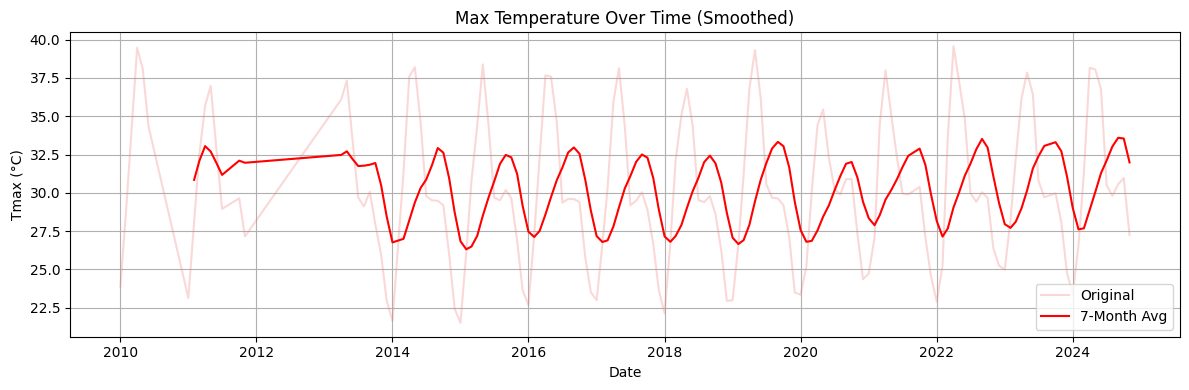

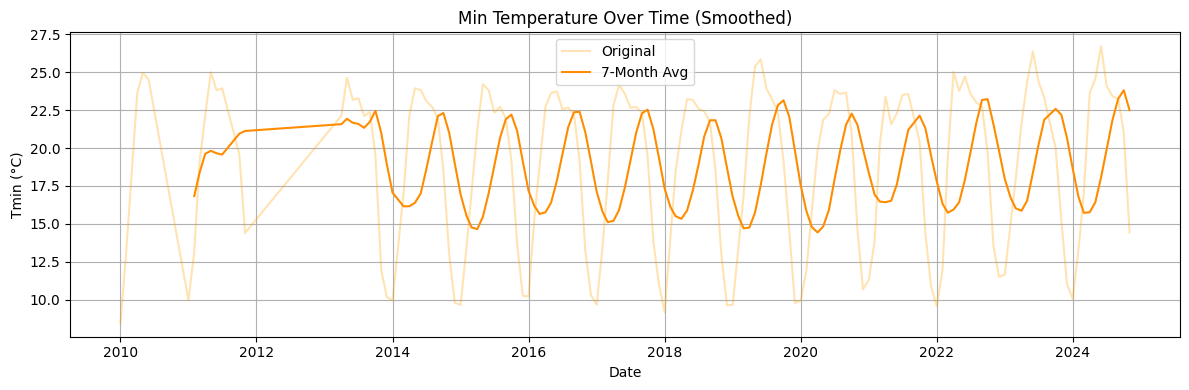

In [2]:
import matplotlib.pyplot as plt

# NDWI over time
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['NDWI'], color='green')
plt.title("NDWI Over Time")
plt.xlabel("Date")
plt.ylabel("NDWI")
plt.grid(True)
plt.tight_layout()
plt.show()

# Add rolling averages to the dataset (7-month moving window)
merged_df['Rainfall_Rolling'] = merged_df['Rainfall_mm'].rolling(window=7).mean()
merged_df['Tmax_Rolling'] = merged_df['Tmax_C'].rolling(window=7).mean()
merged_df['Tmin_Rolling'] = merged_df['Tmin_C'].rolling(window=7).mean()

# Plot Rainfall with smoothing
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Rainfall_mm'], alpha=0.3, label="Original", color='skyblue')
plt.plot(merged_df['Date'], merged_df['Rainfall_Rolling'], label="7-Month Avg", color='blue')
plt.title("Rainfall Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tmax with smoothing
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Tmax_C'], alpha=0.3, label="Original", color='lightcoral')
plt.plot(merged_df['Date'], merged_df['Tmax_Rolling'], label="7-Month Avg", color='red')
plt.title("Max Temperature Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Tmax (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Tmin with smoothing
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Tmin_C'], alpha=0.3, label="Original", color='orange')
plt.plot(merged_df['Date'], merged_df['Tmin_Rolling'], label="7-Month Avg", color='darkorange')
plt.title("Min Temperature Over Time (Smoothed)")
plt.xlabel("Date")
plt.ylabel("Tmin (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Correlation Heatmap


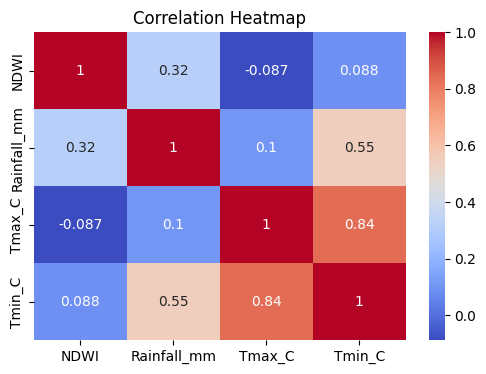

In [3]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(merged_df[['NDWI', 'Rainfall_mm', 'Tmax_C', 'Tmin_C']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Box Plots: Seasonality & Outliers

In [4]:
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year


/tmp/ipython-input-5-219435146.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='NDWI', data=merged_df, palette='Greens')


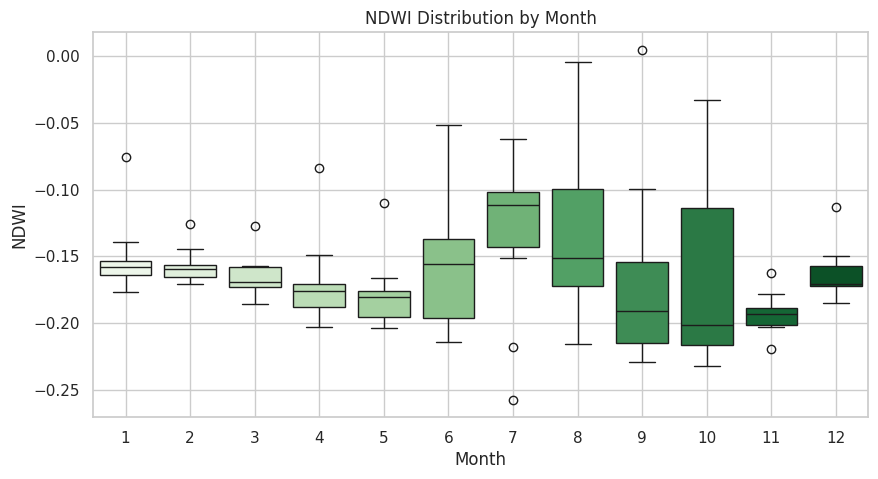

/tmp/ipython-input-5-219435146.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Rainfall_mm', data=merged_df, palette='Blues')


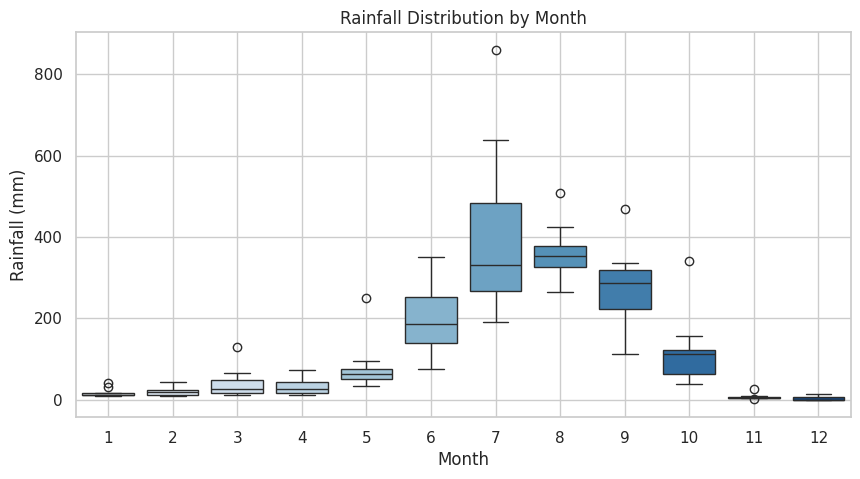

/tmp/ipython-input-5-219435146.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Tmax_C', data=merged_df, palette='Reds')


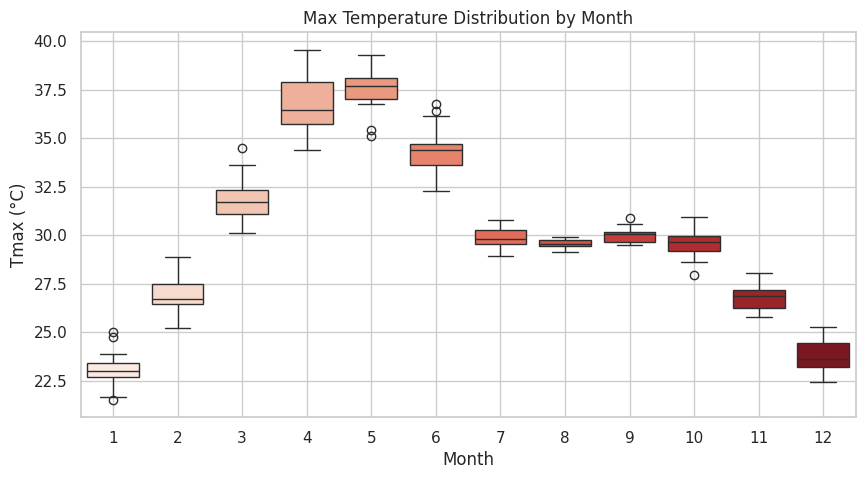

/tmp/ipython-input-5-219435146.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Tmin_C', data=merged_df, palette='Oranges')


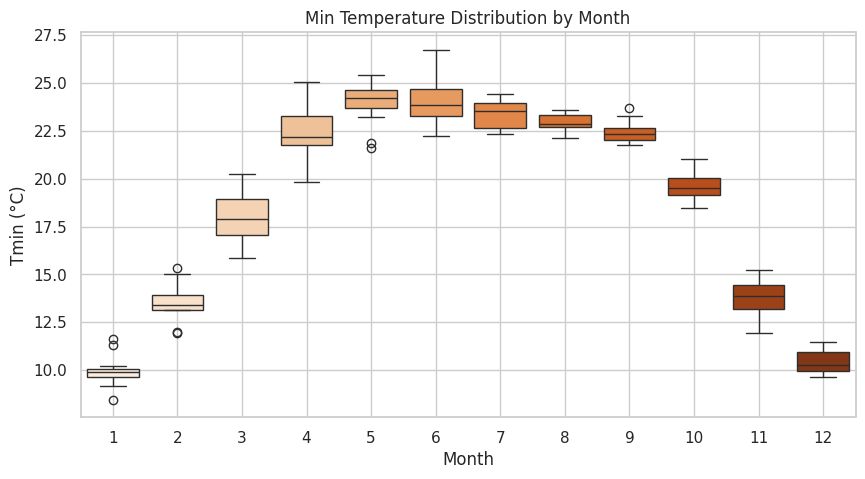

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# 1. NDWI Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='NDWI', data=merged_df, palette='Greens')
plt.title("NDWI Distribution by Month")
plt.xlabel("Month")
plt.ylabel("NDWI")
plt.grid(True)
plt.show()

# 2. Rainfall Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Rainfall_mm', data=merged_df, palette='Blues')
plt.title("Rainfall Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()

# 3. Tmax Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Tmax_C', data=merged_df, palette='Reds')
plt.title("Max Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Tmax (°C)")
plt.grid(True)
plt.show()

# 4. Tmin Box Plot by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='Tmin_C', data=merged_df, palette='Oranges')
plt.title("Min Temperature Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Tmin (°C)")
plt.grid(True)
plt.show()



plotting Histogram to understand the Distribution the the different Features

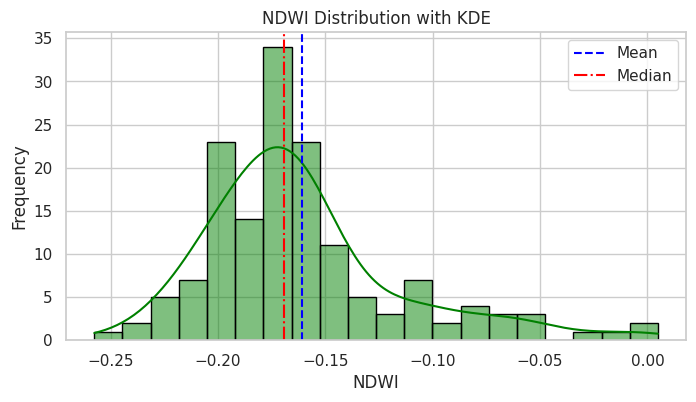

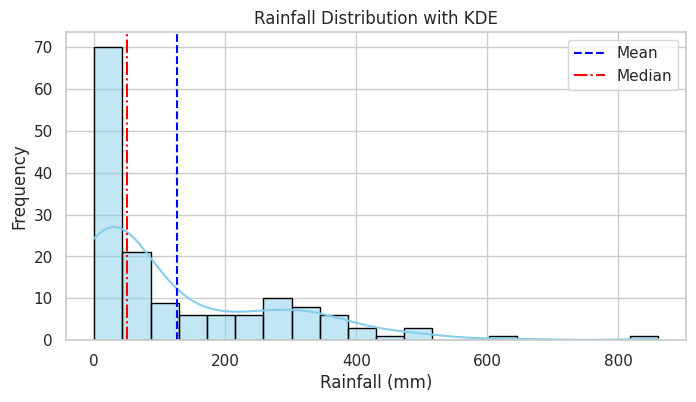

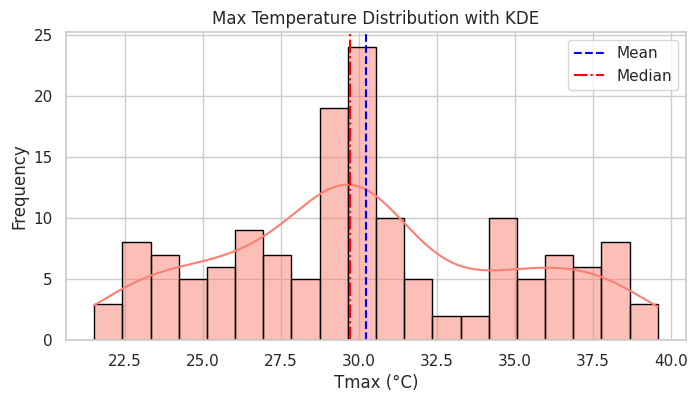

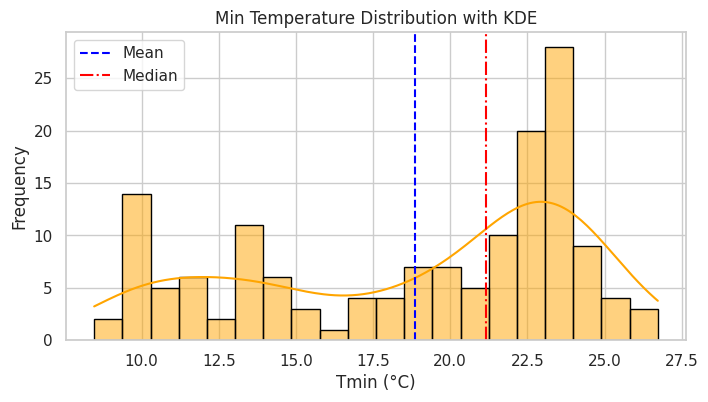

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. NDWI Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['NDWI'], kde=True, color='green', edgecolor='black', bins=20)
plt.axvline(merged_df['NDWI'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['NDWI'].median(), color='red', linestyle='-.', label='Median')
plt.title("NDWI Distribution with KDE")
plt.xlabel("NDWI")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 2. Rainfall Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['Rainfall_mm'], kde=True, color='skyblue', edgecolor='black', bins=20)
plt.axvline(merged_df['Rainfall_mm'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['Rainfall_mm'].median(), color='red', linestyle='-.', label='Median')
plt.title("Rainfall Distribution with KDE")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 3. Tmax Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['Tmax_C'], kde=True, color='salmon', edgecolor='black', bins=20)
plt.axvline(merged_df['Tmax_C'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['Tmax_C'].median(), color='red', linestyle='-.', label='Median')
plt.title("Max Temperature Distribution with KDE")
plt.xlabel("Tmax (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 4. Tmin Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(merged_df['Tmin_C'], kde=True, color='orange', edgecolor='black', bins=20)
plt.axvline(merged_df['Tmin_C'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(merged_df['Tmin_C'].median(), color='red', linestyle='-.', label='Median')
plt.title("Min Temperature Distribution with KDE")
plt.xlabel("Tmin (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


NDWI + Rainfall Distribution Together to understand points with high NDWI and high rainfall as well as identify the flood thresholds

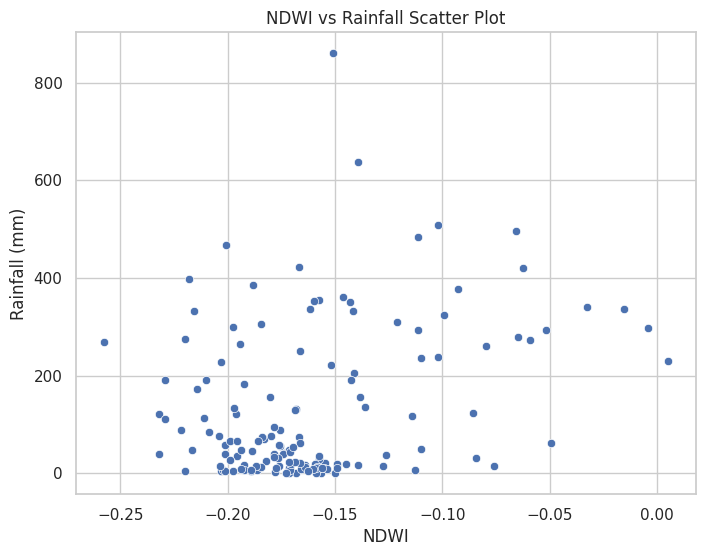

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='NDWI', y='Rainfall_mm')
plt.title("NDWI vs Rainfall Scatter Plot")
plt.xlabel("NDWI")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()


In [8]:
ndwi_75 = merged_df['NDWI'].quantile(0.75)
rain_75 = merged_df['Rainfall_mm'].quantile(0.75)

print(f"NDWI 75th percentile: {ndwi_75}")
print(f"Rainfall 75th percentile: {rain_75}")


NDWI 75th percentile: -0.14907514979618997
Rainfall 75th percentile: 223.97281522433883


Label Data for Classification

In [9]:
def classify(row):
    if row['NDWI'] < 0.1 and row['Rainfall_mm'] < 50:
        return 'Drought'
    elif row['NDWI'] > ndwi_75 and row['Rainfall_mm'] > rain_75:
        return 'Flood'
    else:
        return 'Normal'

merged_df['Condition'] = merged_df.apply(classify, axis=1)


In [10]:
merged_df['Condition'].value_counts()


,count
Condition,
Drought,75
Normal,54
Flood,22


Plot Count of Each Class

/tmp/ipython-input-11-3796512974.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Condition', palette='Set2')


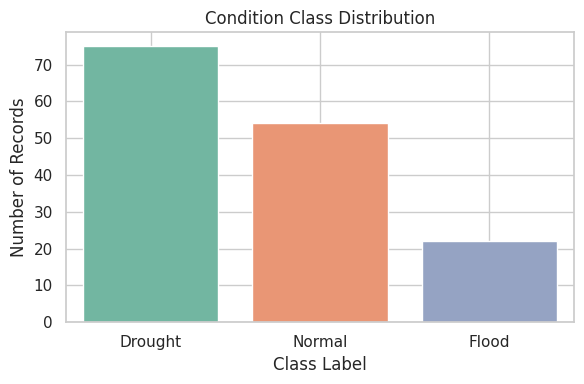

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Condition', palette='Set2')
plt.title("Condition Class Distribution")
plt.ylabel("Number of Records")
plt.xlabel("Class Label")
plt.grid(True)
plt.tight_layout()
plt.show()


Modeling: Random Forest Classification

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the Condition column
le = LabelEncoder()
merged_df['Condition_encoded'] = le.fit_transform(merged_df['Condition'])

# Show the mapping of labels
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Drought': np.int64(0), 'Flood': np.int64(1), 'Normal': np.int64(2)}


In [13]:
from sklearn.model_selection import train_test_split

X = merged_df[['NDWI', 'Rainfall_mm', 'Tmax_C', 'Tmin_C']]
y = merged_df['Condition_encoded']  # make sure this is encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Training Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate classification report
print(classification_report(
    y_test, y_pred, labels=[0, 1, 2], target_names=le.classes_
))



              precision    recall  f1-score   support

     Drought       1.00      1.00      1.00        15
       Flood       1.00      1.00      1.00         5
      Normal       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [15]:
#saving the predicted levels
merged_df['Predicted'] = clf.predict(X)
merged_df['Predicted_Label'] = merged_df['Predicted'].map(dict(zip(le.transform(le.classes_), le.classes_)))
merged_df.to_csv("final_classification_output.csv", index=False)


Plotting the confusion matrix

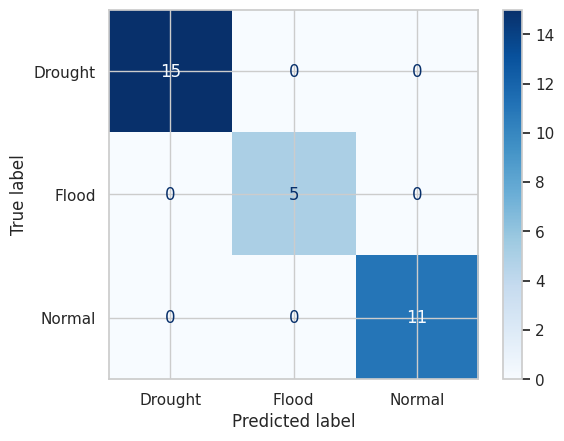

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.show()


**Forecast NDWI using LSTM**

Clean and Split the Data

In [35]:
import numpy as np
import pandas as pd

ndwi_series = merged_df[['Date', 'NDWI']].dropna()
ndwi_series.set_index('Date', inplace=True)
ndwi_series.index = pd.to_datetime(ndwi_series.index)
ndwi_series.sort_index(inplace=True)

# Sort by date to ensure proper sequence
ndvi_series.sort_index(inplace=True)

# Train-test split: train = all except last 12 months, test = last 12 months
train_ndvi = ndvi_series[:-12]
test_ndvi = ndvi_series[-12:]

print("Train size:", len(train_ndvi))
print("Test size:", len(test_ndvi))



train_ndwi = ndwi_series[:'2024-12']

test_ndwi = ndwi_series[-12:]



Train size: 139
Test size: 12


Normalize and Create Sequences for LSTM

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the training NDWI data to [0, 1]
scaler = MinMaxScaler()
ndwi_train_scaled = scaler.fit_transform(train_ndvi)

# Define sequence creation function
def create_sequences(data, window=12):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create sequences using a 12-month window
window_size = 12
X_train, y_train = create_sequences(ndwi_train_scaled, window=window_size)

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (127, 12, 1)
y_train shape: (127, 1)


Build and Train the LSTM Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()
model.add(LSTM(units=64, activation='tanh', input_shape=(window_size, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0904
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0373
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0357
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0401
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0331
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0312
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0352
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0329
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0317
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0260
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380
Epoch 16

Future NDWI forecasting

In [47]:
# Start with the last 12 months from training data (2024)
last_window = ndwi_train_scaled[-window_size:]
input_seq = last_window.reshape(1, window_size, 1)

future_scaled_preds = []

for _ in range(24):  # forecast 24 future months
    next_pred = model.predict(input_seq, verbose=0)[0][0]
    future_scaled_preds.append(next_pred)

    # Slide window forward
    input_seq = np.append(input_seq[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse scale predictions to original NDWI
future_preds = scaler.inverse_transform(np.array(future_scaled_preds).reshape(-1, 1))

# Generate 24 dates starting from Jan 2025
future_dates = pd.date_range(start=pd.to_datetime("2025-01-01"), periods=24, freq="M")

# Create forecast DataFrame
ndwi_forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_NDWI': future_preds.flatten()})
ndwi_forecast_df.set_index('Date', inplace=True)
month = int(input("Enter the number of months to forecast: "))
ndwi_forecast_df.head(month)


/tmp/ipython-input-47-3004286100.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=pd.to_datetime("2025-01-01"), periods=24, freq="M")


Enter the number of months to forecast: 8


,Predicted_NDWI
Date,
2025-01-31,-0.170234
2025-02-28,-0.160395
2025-03-31,-0.155580
2025-04-30,-0.157530
2025-05-31,-0.162412
2025-06-30,-0.165647
2025-07-31,-0.166232
2025-08-31,-0.164352


**Forecasted climate data using Prophet**

In [48]:
import pandas as pd

# Load your uploaded CSV
df = pd.read_csv("/content/Monthly_Rainfall_Temp_Export.csv")

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df = df.set_index('Date')
df = df.sort_index()

# Preview
df.tail()


,system:index,Rainfall_mm,Tmax_C,Tmin_C,.geo
Date,,,,,
2024-07-01,174,278.276157,30.501850,24.100925,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-08-01,175,508.259504,29.813642,23.421387,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-09-01,176,337.101196,30.560925,23.261387,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-10-01,177,88.705994,30.967168,21.024740,"{""type"":""MultiPoint"",""coordinates"":[]}"
2024-11-01,178,5.061851,27.254104,14.430173,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [49]:
from prophet import Prophet

def forecast_column(data, column_name, periods=12):
    df_prophet = data[[column_name]].reset_index().rename(columns={'Date': 'ds', column_name: 'y'})

    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=periods, freq='MS')  # 'MS' = Month Start
    forecast = model.predict(future)

    result = forecast[['ds', 'yhat']].tail(periods).copy()
    result = result.rename(columns={'ds': 'Date', 'yhat': f"{column_name}_forecast"})
    result = result.set_index('Date')

    return result


In [50]:
rainfall_forecast = forecast_column(df, 'Rainfall_mm')
tmax_forecast = forecast_column(df, 'Tmax_C')
tmin_forecast = forecast_column(df, 'Tmin_C')

# Merge all forecasts
climate_forecast = rainfall_forecast \
    .join(tmax_forecast, how='inner') \
    .join(tmin_forecast, how='inner')
month = int(input("Enter the number of months to forecast: "))
climate_forecast.head(month)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpznvb_d3r/4ju246_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpznvb_d3r/oajl33wk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71624', 'data', 'file=/tmp/tmpznvb_d3r/4ju246_0.json', 'init=/tmp/tmpznvb_d3r/oajl33wk.json', 'output', 'file=/tmp/tmpznvb_d3r/prophet_modeltdumsvea/prophet_model-20250702075226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:52:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:52:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

Enter the number of months to forecast: 8


,Rainfall_mm_forecast,Tmax_C_forecast,Tmin_C_forecast
Date,,,
2024-12-01,4.404320,24.755873,11.379467
2025-01-01,20.101137,24.219502,10.678204
2025-02-01,27.110261,27.599739,14.347738
2025-03-01,40.340123,33.008038,18.911673
2025-04-01,39.078851,37.723249,23.392907
2025-05-01,76.904870,38.368940,24.793093
2025-06-01,201.444405,35.355437,25.089701
2025-07-01,385.680157,30.759433,24.333872


# **Final Prediction**

In [51]:
import pandas as pd

# Copy and prepare data
ndwi_forecast_df = ndwi_forecast_df.copy()
climate_forecast_df = climate_forecast.copy()

# Convert 'Date' column to datetime and set as index
if 'Date' in ndwi_forecast_df.columns:
    ndwi_forecast_df['Date'] = pd.to_datetime(ndwi_forecast_df['Date'])
    ndwi_forecast_df.set_index('Date', inplace=True)

if 'Date' in climate_forecast_df.columns:
    climate_forecast_df['Date'] = pd.to_datetime(climate_forecast_df['Date'])
    climate_forecast_df.set_index('Date', inplace=True)

# Align both DataFrames to month start for consistent merging
ndwi_forecast_df.index = ndwi_forecast_df.index.to_period('M').to_timestamp()
climate_forecast_df.index = climate_forecast_df.index.to_period('M').to_timestamp()

# Merge both forecasts on index (Date)
combined_forecast = pd.merge(climate_forecast_df, ndwi_forecast_df,
                             left_index=True, right_index=True, how='inner')

# Define the classification rule
def classify_condition(row):
    ndwi = row['Predicted_NDWI']
    rainfall = row['Rainfall_mm_forecast']

    if ndwi < -0.15 and rainfall < 50:
        return 'Drought'
    elif ndwi > -0.17 and rainfall > 200:
        return 'Flood'
    else:
        return 'Normal'

# Apply classification
combined_forecast['Predicted_Condition'] = combined_forecast.apply(classify_condition, axis=1)

# Ask user for months to display
try:
    month = int(input("Enter the number of months to forecast: "))
except ValueError:
    print("Invalid input. Defaulting to 12 months.")
    month = 12

# Prepare and print the output
combined_forecast.reset_index(inplace=True)
final_result = combined_forecast[['Date', 'Predicted_NDWI', 'Rainfall_mm_forecast', 'Predicted_Condition']].head(month)

print("\nFuture Water Condition Forecast:\n")
print(final_result.to_string(index=False))


Enter the number of months to forecast: 8

Future Water Condition Forecast:

      Date  Predicted_NDWI  Rainfall_mm_forecast Predicted_Condition
2025-01-01       -0.170234             20.101137             Drought
2025-02-01       -0.160395             27.110261             Drought
2025-03-01       -0.155580             40.340123             Drought
2025-04-01       -0.157530             39.078851             Drought
2025-05-01       -0.162412             76.904870              Normal
2025-06-01       -0.165647            201.444405               Flood
2025-07-01       -0.166232            385.680157               Flood
2025-08-01       -0.164352            358.939905               Flood


Visualization

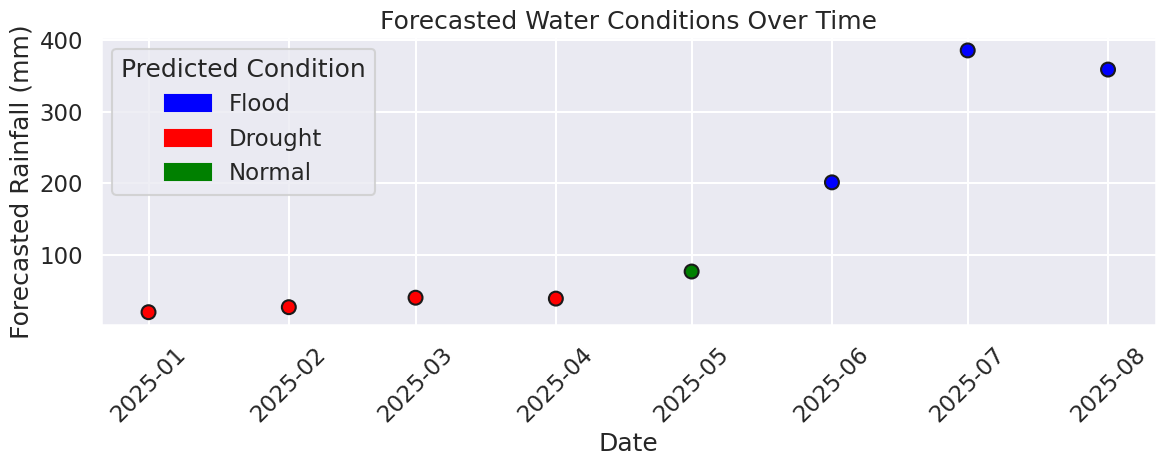

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

final_result['Date'] = pd.to_datetime(final_result['Date'])

color_map = {
    'Flood': 'blue',
    'Drought': 'red',
    'Normal': 'green'
}

colors = final_result['Predicted_Condition'].map(color_map)

plt.figure(figsize=(12, 5))
plt.scatter(final_result['Date'], final_result['Rainfall_mm_forecast'], c=colors, s=100, marker='o', edgecolors='k')
plt.title("Forecasted Water Conditions Over Time")
plt.xlabel("Date")
plt.ylabel("Forecasted Rainfall (mm)")
plt.xticks(rotation=45)
plt.grid(True)

legend_patches = [mpatches.Patch(color=clr, label=label) for label, clr in color_map.items()]
plt.legend(handles=legend_patches, title="Predicted Condition")

plt.tight_layout()
plt.show()


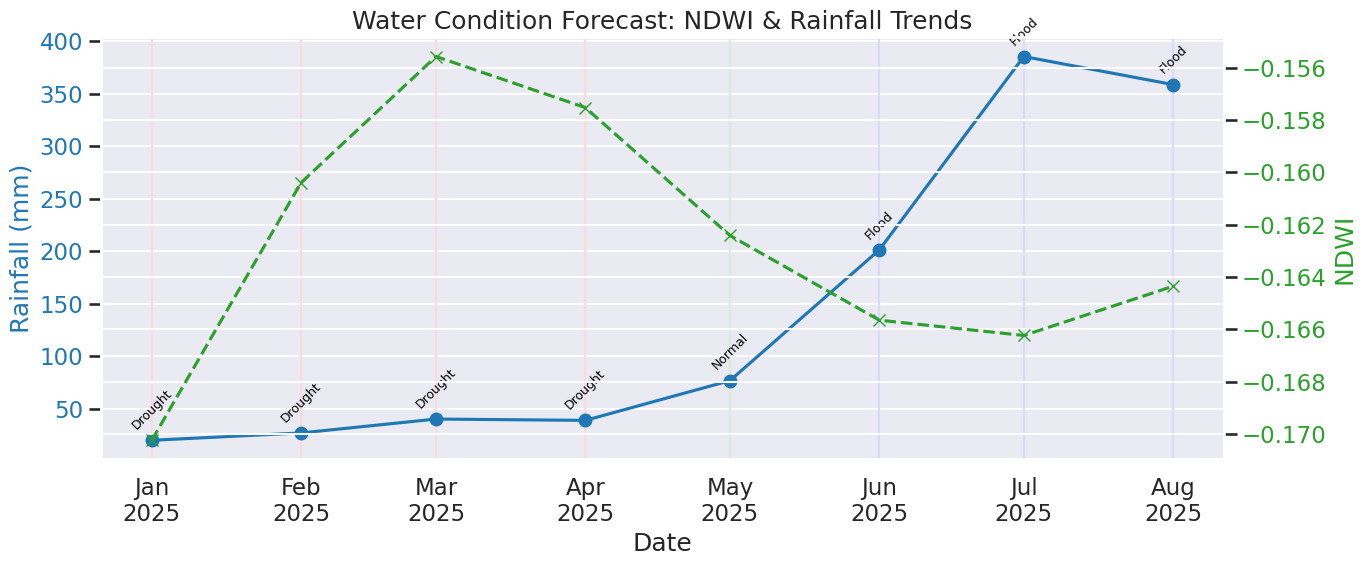

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Make sure 'Date' is datetime format
final_result['Date'] = pd.to_datetime(final_result['Date'])

# Set seaborn theme (no need for matplotlib style)
sns.set_theme(style="darkgrid", context="talk")

# Create figure and dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Rainfall
ax1.set_xlabel("Date")
ax1.set_ylabel("Rainfall (mm)", color='tab:blue')
ax1.plot(final_result['Date'], final_result['Rainfall_mm_forecast'],
         color='tab:blue', marker='o', label='Rainfall (mm)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot NDWI on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel("NDWI", color='tab:green')
ax2.plot(final_result['Date'], final_result['Predicted_NDWI'],
         color='tab:green', linestyle='--', marker='x', label='NDWI')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Shade regions based on condition
for _, row in final_result.iterrows():
    condition_color = {
        'Flood': 'blue',
        'Drought': 'red',
        'Normal': 'green'
    }.get(row['Predicted_Condition'], 'gray')

    ax1.axvspan(row['Date'], row['Date'], color=condition_color, alpha=0.15)

# Annotate each point
for _, row in final_result.iterrows():
    ax1.annotate(row['Predicted_Condition'],
                 xy=(row['Date'], row['Rainfall_mm_forecast']),
                 xytext=(0, 8),
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 rotation=45,
                 color='black')

# Format x-axis dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

# Title and layout
plt.title("Water Condition Forecast: NDWI & Rainfall Trends")
fig.tight_layout()
plt.show()
